<!--BOOK_INFORMATION-->
<img align="left" style="padding-right:10px;" src="figures/PDSH-cover-small.png">
*This notebook contains an excerpt from the [Python Data Science Handbook](http://shop.oreilly.com/product/0636920034919.do) by Jake VanderPlas; the content is available [on GitHub](https://github.com/jakevdp/PythonDataScienceHandbook).*

*The text is released under the [CC-BY-NC-ND license](https://creativecommons.org/licenses/by-nc-nd/3.0/us/legalcode), and code is released under the [MIT license](https://opensource.org/licenses/MIT). If you find this content useful, please consider supporting the work by [buying the book](http://shop.oreilly.com/product/0636920034919.do)!*

<!--NAVIGATION-->
< [Comparisons, Masks, and Boolean Logic](02.06-Boolean-Arrays-and-Masks.ipynb) | [Contents](Index.ipynb) | [Sorting Arrays](02.08-Sorting.ipynb) >

# Fancy Indexing

在前面的章节中，我们看到了如何使用简单的索引（``arr[0]``），切片（``arr[:5]``）和布尔掩码（``arr[arr > 0]``）访问和修改数组。在本节中，我们将介绍另一种数组索引方式，*fancy indexing*。Fancing indexing 和我们已经看到的简单索引类似，但是在这里我们传递的是一个索引数组而不是一个标量。这使我们能够非常快速地访问和修改负责的数据子集。

In the previous sections, we saw how to access and modify portions of arrays using simple indices (e.g., ``arr[0]``), slices (e.g., ``arr[:5]``), and Boolean masks (e.g., ``arr[arr > 0]``).
In this section, we'll look at another style of array indexing, known as *fancy indexing*.
Fancy indexing is like the simple indexing we've already seen, but we pass arrays of indices in place of single scalars.
This allows us to very quickly access and modify complicated subsets of an array's values.

## 初识 Fancing Indexing

## Exploring Fancy Indexing

Fancing indexing 的概念非常简单：用索引数组访问多个数组元素。举一个例子：

Fancy indexing is conceptually simple: it means passing an array of indices to access multiple array elements at once.
For example, consider the following array:

In [1]:
import numpy as np
rand = np.random.RandomState(42)

x = rand.randint(100, size=10)
print(x)

[51 92 14 71 60 20 82 86 74 74]


如果我们想要访问其中三个元素，我们可以这样做：

Suppose we want to access three different elements. We could do it like this:

In [2]:
[x[3], x[7], x[2]]

[71, 86, 14]

或者，我们可以传递这三个值的索引：

Alternatively, we can pass a single list or array of indices to obtain the same result:

In [3]:
ind = [3, 7, 4]
x[ind]

array([71, 86, 60])

使用 fancy indexing 的时候，结果的形状与*索引数组*的形状（而不是原数组的形状）保持一致：

When using fancy indexing, the shape of the result reflects the shape of the *index arrays* rather than the shape of the *array being indexed*:

In [4]:
ind = np.array([[3, 7],
                [4, 5]])
x[ind]

array([[71, 86],
       [60, 20]])

Fancing indexing 也支持多维数组，看下面这个例子：

Fancy indexing also works in multiple dimensions. Consider the following array:

In [5]:
X = np.arange(12).reshape((3, 4))
X

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

和一般的索引类似，第一个索引对应行，第二个索引对应列：

Like with standard indexing, the first index refers to the row, and the second to the column:

In [6]:
row = np.array([0, 1, 2])
col = np.array([2, 1, 3])
X[row, col]

array([ 2,  5, 11])

可以看到第一个值是 ``X[0, 2]``，第二个是 ``X[1, 1]`` 第三个是 ``X[2, 3]``。这种在 fancy indexing 中出现的二元组索引同样要遵守在[矩阵计算：广播](02.05-Computation-on-arrays-broadcasting.ipynb)中介绍的广播的规则。那么如果饿哦们把一个列向量与一个行向量组成一个索引，我们就得到了一个二维索引：

Notice that the first value in the result is ``X[0, 2]``, the second is ``X[1, 1]``, and the third is ``X[2, 3]``.
The pairing of indices in fancy indexing follows all the broadcasting rules that were mentioned in [Computation on Arrays: Broadcasting](02.05-Computation-on-arrays-broadcasting.ipynb).
So, for example, if we combine a column vector and a row vector within the indices, we get a two-dimensional result:

In [7]:
X[row[:, np.newaxis], col]

array([[ 2,  1,  3],
       [ 6,  5,  7],
       [10,  9, 11]])

和之前广播中看到的情况一样，每一行与列向量对应，如果换成一个算术运算就是这个样子：

Here, each row value is matched with each column vector, exactly as we saw in broadcasting of arithmetic operations.
For example:

In [7]:
row[:, np.newaxis] * col

array([[0, 0, 0],
       [2, 1, 3],
       [4, 2, 6]])

要记住 fancing indexing 返回的值反映了*广播后的索引的形状*，而不是原有的数组的形状。

It is always important to remember with fancy indexing that the return value reflects the *broadcasted shape of the indices*, rather than the shape of the array being indexed.

## 索引组合

## Combined Indexing

和其他索引组合使用，fancy indexing 可以成为一个更为强大的工具：

For even more powerful operations, fancy indexing can be combined with the other indexing schemes we've seen:

In [8]:
print(X)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


我们可以把普通索引与 fancy indexing 一起使用：

We can combine fancy and simple indices:

In [10]:
X[2, [2, 0, 1]]

array([10,  8,  9])

我们也可以把切片与 fancy indexing 一起使用：

We can also combine fancy indexing with slicing:

In [9]:
X[1:, [2, 0, 1]]

array([[ 6,  4,  5],
       [10,  8,  9]])

我们还可以把掩码和 fancy indexing 一起使用：

And we can combine fancy indexing with masking:

In [10]:
mask = np.array([1, 0, 1, 0], dtype=bool)
X[row[:, np.newaxis], mask]

array([[ 0,  2],
       [ 4,  6],
       [ 8, 10]])

这些索引操作组合使用可以让我们非常灵活的访问、操纵数组中的数据。

All of these indexing options combined lead to a very flexible set of operations for accessing and modifying array values.

## 示例：选择随机点

## Example: Selecting Random Points

Fancy indexing 经常用于从一个矩阵中选择行的子集。假如我们有一个 NxD 的矩阵，表示有 N 个维度为 D 的数据，比如以下就是一些服从二维高斯分布的点：

One common use of fancy indexing is the selection of subsets of rows from a matrix.
For example, we might have an $N$ by $D$ matrix representing $N$ points in $D$ dimensions, such as the following points drawn from a two-dimensional normal distribution:

In [12]:
mean = [0, 0]
cov = [[1, 2],
       [2, 5]]
X = rand.multivariate_normal(mean, cov, 100)
X.shape

(100, 2)

运用我们将在[初识 Matplotlib](04.00-Introduction-To-Matplotlib.ipynb)中介绍的工具，我们可以用一个散点图展示这些数据

Using the plotting tools we will discuss in [Introduction to Matplotlib](04.00-Introduction-To-Matplotlib.ipynb), we can visualize these points as a scatter-plot:

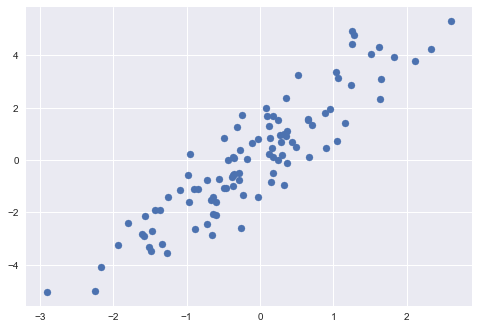

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # for plot styling

plt.scatter(X[:, 0], X[:, 1]);

现在我们要用 fancy indexing 随机获取其中的 20 个点。首先我们要随机选择 20 个无重复的索引，然后用 fancy indexing 的方式从原始数组获取结果：

Let's use fancy indexing to select 20 random points. We'll do this by first choosing 20 random indices with no repeats, and use these indices to select a portion of the original array:

In [14]:
indices = np.random.choice(X.shape[0], 20, replace=False)
indices

array([83, 40, 43, 84, 62, 75, 54, 38, 73, 81, 10, 53, 82, 46, 29, 64, 89,
       76, 13, 56])

In [18]:
selection = X[indices]  # fancy indexing here
selection.shape

(20, 2)

为了能在视图上看到我们所选择的点，我们用圆圈标记所选择的点：

Now to see which points were selected, let's over-plot large circles at the locations of the selected points:

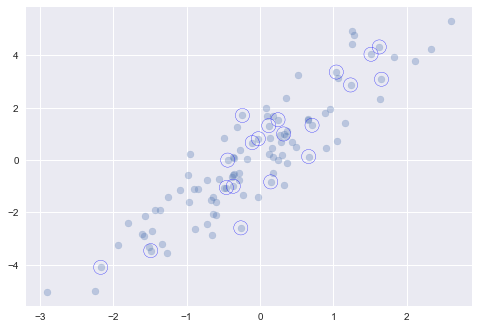

In [25]:
plt.scatter(X[:, 0], X[:, 1], alpha=0.3)
plt.scatter(selection[:, 0], selection[:, 1],
            facecolor='none', s=200, edgecolors='b'); # 译者在这里添加了额外的参数 edgecolors='b'

这种随机选择数据的手段常被用于切分数据集：通常用在统计模型中切分训练集与验证集（详见[超参数与模型验证](05.03-Hyperparameters-and-Model-Validation.ipynb)）或是用抽样的方法做一些统计分析。

This sort of strategy is often used to quickly partition datasets, as is often needed in train/test splitting for validation of statistical models (see [Hyperparameters and Model Validation](05.03-Hyperparameters-and-Model-Validation.ipynb)), and in sampling approaches to answering statistical questions.

## 用 Fancy Indexing 操纵数据

## Modifying Values with Fancy Indexing

正如 fancy indexing 可以访问数组的子集，它也能修改数组的子集。举个例子，假设我们有一组数据的索引，我们想要把这些索引的值更新为同一个数值：

Just as fancy indexing can be used to access parts of an array, it can also be used to modify parts of an array.
For example, imagine we have an array of indices and we'd like to set the corresponding items in an array to some value:

In [26]:
x = np.arange(10)
i = np.array([2, 1, 8, 4])
x[i] = 99
print(x)

[ 0 99 99  3 99  5  6  7 99  9]


我们可以使用任何赋值运算符：

We can use any assignment-type operator for this. For example:

In [27]:
x[i] -= 10
print(x)

[ 0 89 89  3 89  5  6  7 89  9]


注意，重复的索引可能会导致一些意想不到的后果，看下面这个例子：

Notice, though, that repeated indices with these operations can cause some potentially unexpected results. Consider the following:

In [28]:
x = np.zeros(10)
x[[0, 0]] = [4, 6]
print(x)

[ 6.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


为什么 4 没有出现在结果中呢？因为我们首先执行了 ``x[0] = 4`` 然后又执行了 ``x[6]`` 所以原有的数据被覆盖了，其结果当然就是 6 了。然后再来看另一个例子：

Where did the 4 go? The result of this operation is to first assign ``x[0] = 4``, followed by ``x[0] = 6``.
The result, of course, is that ``x[0]`` contains the value 6.

Fair enough, but consider this operation:

In [21]:
i = [2, 3, 3, 4, 4, 4]
x[i] += 1
x

array([ 6.,  0.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.])

你可能觉得 ``x[3]`` 的值应该是 2 而 ``x[3]`` 的值应该是 3，因为毕竟同一个索引重复了多次，那就应该计算多次。为什么结果和预期不符呢。

从概念上讲 ``x[i] += 1`` 就是 ``x[i] = x[i] + 1``。首先执行运算 ``x[i] + 1`` 然后再把结果赋值给 x。如果这么考虑的话，实际上就不会有多次运算，而是多次赋值，这并不会影响结果。

如果想要重复运算的话，就要用到 ufuncs 中的 ``at()`` 方法（在 NumPy 1.8）后可用：

You might expect that ``x[3]`` would contain the value 2, and ``x[3]`` would contain the value 3, as this is how many times each index is repeated. Why is this not the case?
Conceptually, this is because ``x[i] += 1`` is meant as a shorthand of ``x[i] = x[i] + 1``. ``x[i] + 1`` is evaluated, and then the result is assigned to the indices in x.
With this in mind, it is not the augmentation that happens multiple times, but the assignment, which leads to the rather nonintuitive results.

So what if you want the other behavior where the operation is repeated? For this, you can use the ``at()`` method of ufuncs (available since NumPy 1.8), and do the following:

In [29]:
x = np.zeros(10)
np.add.at(x, i, 1)
print(x)

[ 0.  1.  1.  0.  1.  0.  0.  0.  1.  0.]


``at()`` 方法在指定的索引上（这里是 ``i``）用指定的值（这里是 1）就地执行相应的运算。另一个类似的方法是 ``reduceat()``，相关信息请参与 NumPy 的文档。

The ``at()`` method does an in-place application of the given operator at the specified indices (here, ``i``) with the specified value (here, 1).
Another method that is similar in spirit is the ``reduceat()`` method of ufuncs, which you can read about in the NumPy documentation.

## 示例：数据分级

## Example: Binning Data

按照以上的思路，你可以快速的对数据分级然后创建直方图。例如我们有 1000 个值，我们希望对数据分级后看到数据所述的区域。我们可以用 ``ufunc.at``：

You can use these ideas to efficiently bin data to create a histogram by hand.
For example, imagine we have 1,000 values and would like to quickly find where they fall within an array of bins.
We could compute it using ``ufunc.at`` like this:

In [33]:
np.random.seed(42)
x = np.random.randn(100)

# compute a histogram by hand
bins = np.linspace(-5, 5, 20)
counts = np.zeros_like(bins)

# find the appropriate bin for each x
i = np.searchsorted(bins, x)

# add 1 to each of these bins
np.add.at(counts, i, 1)

``counts`` 就是落到各个分级（bin）中的点的个数，换句话所就是直方图：

The counts now reflect the number of points within each bin–in other words, a histogram:

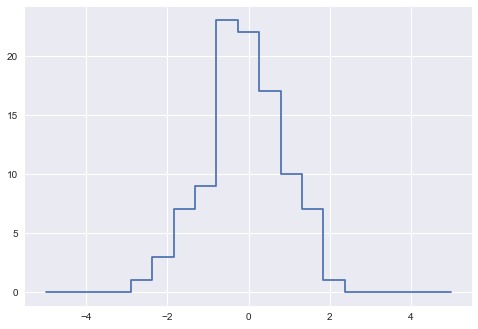

In [34]:
# plot the results
plt.plot(bins, counts, linestyle='steps');

当然如果每次需要直方图的时候都要怎么做实在是太麻烦了。因此 Matplotlib 提供了 ``plt.hist()`` 方法，只需一行就能完成上面的功能：


Of course, it would be silly to have to do this each time you want to plot a histogram.
This is why Matplotlib provides the ``plt.hist()`` routine, which does the same in a single line:

```python
plt.hist(x, bins, histtype='step');
```

这个函数会得到一个和我们上面基本上一样的结果。计算直方图的时候 ``matplotlib`` 用到了 ``np.histogram`` 它和我们上面的计算方法是类似的，我们可以对比一下两者的结果：

This function will create a nearly identical plot to the one seen here.
To compute the binning, ``matplotlib`` uses the ``np.histogram`` function, which does a very similar computation to what we did before. Let's compare the two here:

In [35]:
print("NumPy routine:")
%timeit counts, edges = np.histogram(x, bins)

print("Custom routine:")
%timeit np.add.at(counts, np.searchsorted(bins, x), 1)

NumPy routine:
The slowest run took 45.78 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 53.8 µs per loop
Custom routine:
The slowest run took 19.34 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 16.6 µs per loop


我们自己的算法居然比 NumPy 内置的算法快了好几倍。如果你去查看 ``np.histogram`` 的源码（你可以在 IPython 中用 ``np.histogram??`` 来看到源码）会发现它比我们做的要复杂的多。这是因为 NumPy 的算法更加灵活，并且对数据量更大的情况作了优化：

Our own one-line algorithm is several times faster than the optimized algorithm in NumPy! How can this be?
If you dig into the ``np.histogram`` source code (you can do this in IPython by typing ``np.histogram??``), you'll see that it's quite a bit more involved than the simple search-and-count that we've done; this is because NumPy's algorithm is more flexible, and particularly is designed for better performance when the number of data points becomes large:

In [36]:
x = np.random.randn(1000000)
print("NumPy routine:")
%timeit counts, edges = np.histogram(x, bins)

print("Custom routine:")
%timeit np.add.at(counts, np.searchsorted(bins, x), 1)

NumPy routine:
10 loops, best of 3: 61.4 ms per loop
Custom routine:
10 loops, best of 3: 133 ms per loop


从这里我们也能看到算法执行效率不是几个简单的问题。一个算法如果在大数据集上表现的好不代表它适用于小数据集，反言之也类似（详见[大 O 表示法](02.08-Sorting.ipynb#Aside:-Big-O-Notation)）。但是当你自己写了这些算法之后，你也就了解了这些方法的原理，你就能够自己对其进行扩展。

所以要想用 Python 高效处理数据密集的情况，一方面要知道以及何时使用 ``np.histogram`` 这样的方法，同时又要知道如何利用更低级的函数执行更灵活的运算。

What this comparison shows is that algorithmic efficiency is almost never a simple question. An algorithm efficient for large datasets will not always be the best choice for small datasets, and vice versa (see [Big-O Notation](02.08-Sorting.ipynb#Aside:-Big-O-Notation)).
But the advantage of coding this algorithm yourself is that with an understanding of these basic methods, you could use these building blocks to extend this to do some very interesting custom behaviors.
The key to efficiently using Python in data-intensive applications is knowing about general convenience routines like ``np.histogram`` and when they're appropriate, but also knowing how to make use of lower-level functionality when you need more pointed behavior.

<!--NAVIGATION-->
< [Comparisons, Masks, and Boolean Logic](02.06-Boolean-Arrays-and-Masks.ipynb) | [Contents](Index.ipynb) | [Sorting Arrays](02.08-Sorting.ipynb) >